In [19]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
#1）忽略警告的用法
#import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline
#2）内嵌绘图忽略plt.show()--------%matplotlib inline
#3)数据清洗三大块：缺失值，异常值，分类变量

from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [20]:
df_train = pd.read_csv('C:/Users/Administrator/Scikit_learn/HOUSEPRICE/Book1.csv')
df_train.columns

Index(['Well', 'Thickiness', 'Por', 'K', 'Cal', 'Md', 'LLD', 'GR', 'AC', 'DEN',
       'RMN', 'RMG', 'ILD', 'GRmax', 'GRmin', 'RMNmax', 'SPmax', 'DGR', 'Ceil',
       'Middle', 'Floor', 'Vsh', 'SP', 'Min', 'Max', 'Ave'],
      dtype='object')

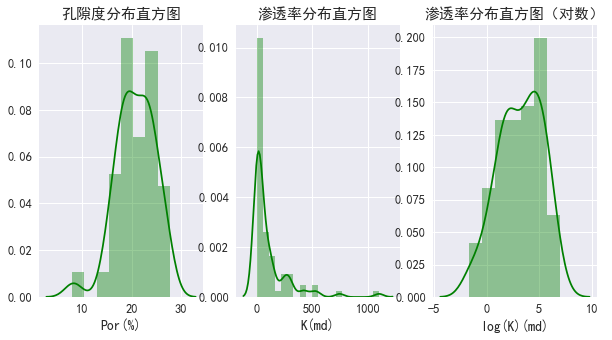

In [21]:
plt.figure(figsize=(10,5))
df_train['K'].describe()
plt.subplot(131)
sns.distplot(df_train['Por'],color='g');
plt.title(u"孔隙度分布直方图")
plt.xlabel('Por(%)')
plt.subplot(132)
sns.distplot(df_train['K'],color='g');
plt.title(u"渗透率分布直方图")
plt.xlabel('K(md)')
plt.subplot(133)
sns.distplot(np.log(df_train['K']),color='g');
plt.title(u"渗透率分布直方图（对数）")
plt.xlabel('log(K)(md)')
plt.savefig("C:/Users/Administrator/Desktop/plot.tif",dpi=500)

#4）sns.distplot

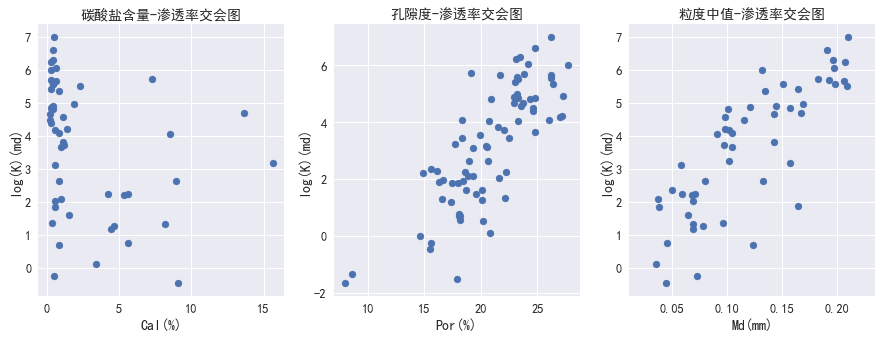

In [22]:
#scatter plot grlivarea/saleprice
plt.figure(figsize=(15,5))
var = 'Cal'
data = pd.concat([np.log(df_train['K']), df_train[var]], axis=1)
plt.subplot(131)
plt.scatter(x=data[var], y=data['K']);
plt.xlabel('Cal(%)',fontsize=14)
plt.ylabel('log(K)(md)',fontsize=14)
plt.title(u"碳酸盐含量-渗透率交会图",fontsize=14)
#scatter plot grlivarea/saleprice
var = 'Por'
data = pd.concat([np.log(df_train['K']), df_train[var]], axis=1)
plt.subplot(132)
plt.scatter(x=data[var], y=data['K']);
plt.xlabel('Por(%)',fontsize=14)
plt.ylabel('log(K)(md)',fontsize=14)
plt.title(u"孔隙度-渗透率交会图",fontsize=14)
var = 'Md'
data = pd.concat([np.log(df_train['K']), df_train[var]], axis=1)
plt.subplot(133)
plt.scatter(x=data[var], y=data['K']);
plt.xlabel('Md(mm)',fontsize=14)
plt.ylabel('log(K)(md)',fontsize=14)
plt.title(u"粒度中值-渗透率交会图",fontsize=14)
plt.savefig("C:/Users/Administrator/Desktop/plot2.tif",dpi=500)

Text(0,0.5,'K(md)')

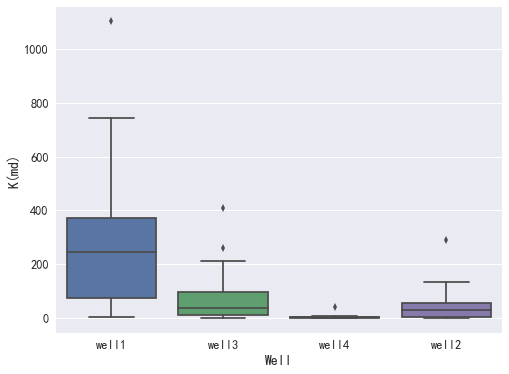

In [23]:
#box plot overallqual/saleprice
var = 'Well'
data = pd.concat([df_train['K'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="K", data=data)
plt.ylabel('K(md)',fontsize=14)
#5）sns.boxplot绘制盒子图，可以不用for语句，需要一个分类变量不同值和连续变量的关系


In [24]:

df_train['DEN']=df_train['DEN'].fillna(df_train['DEN'].median(),inplace=True)
df_train['GRmax']=df_train['GRmax'].fillna(df_train['GRmax'].mode(),inplace=True)
df_train['Md']=df_train['Md'].fillna(df_train['Md'].median(),inplace=True)

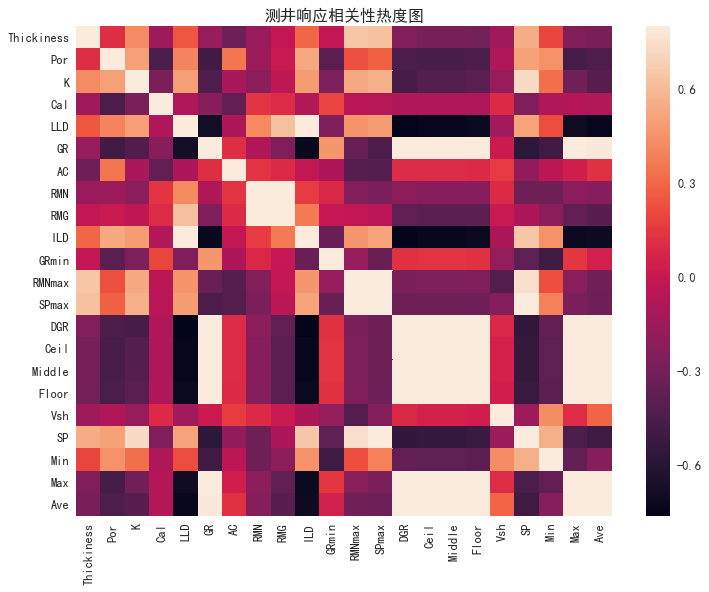

In [25]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=False);
#6）sns.heatmap绘制相关性热度图，
plt.title(u"测井响应相关性热度图",fontsize=16)
plt.savefig("C:/Users/Administrator/Desktop/plot3.tif",dpi=500)

In [26]:
corrmat.isnull().sum()

Thickiness    0
Por           0
K             0
Cal           0
LLD           0
GR            0
AC            0
RMN           0
RMG           0
ILD           0
GRmin         0
RMNmax        0
SPmax         0
DGR           0
Ceil          0
Middle        0
Floor         0
Vsh           0
SP            0
Min           0
Max           0
Ave           0
dtype: int64

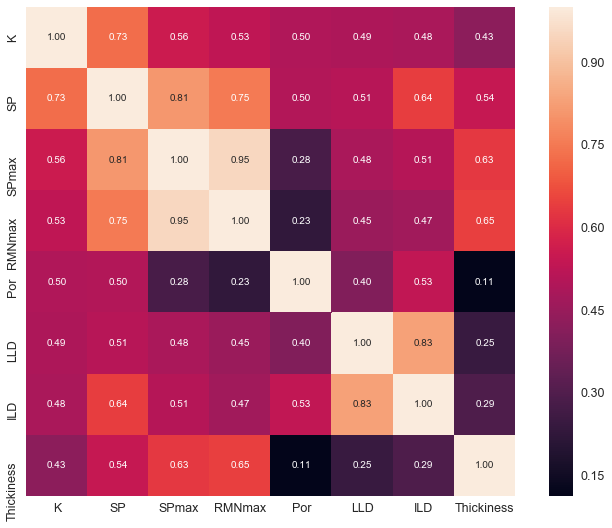

In [27]:
#saleprice correlation matrix
k = 8 #number of variables for heatmap
f, ax = plt.subplots(figsize=(12, 9))
cols = corrmat.nlargest(k, 'K')['K'].index
#7）pd的找出最大的几个数orrmat.nlargest(k, 键)
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

#plt.title(u"我是",fontsize=16)
plt.savefig("C:/Users/Administrator/Desktop/plot4.tif",dpi=500)


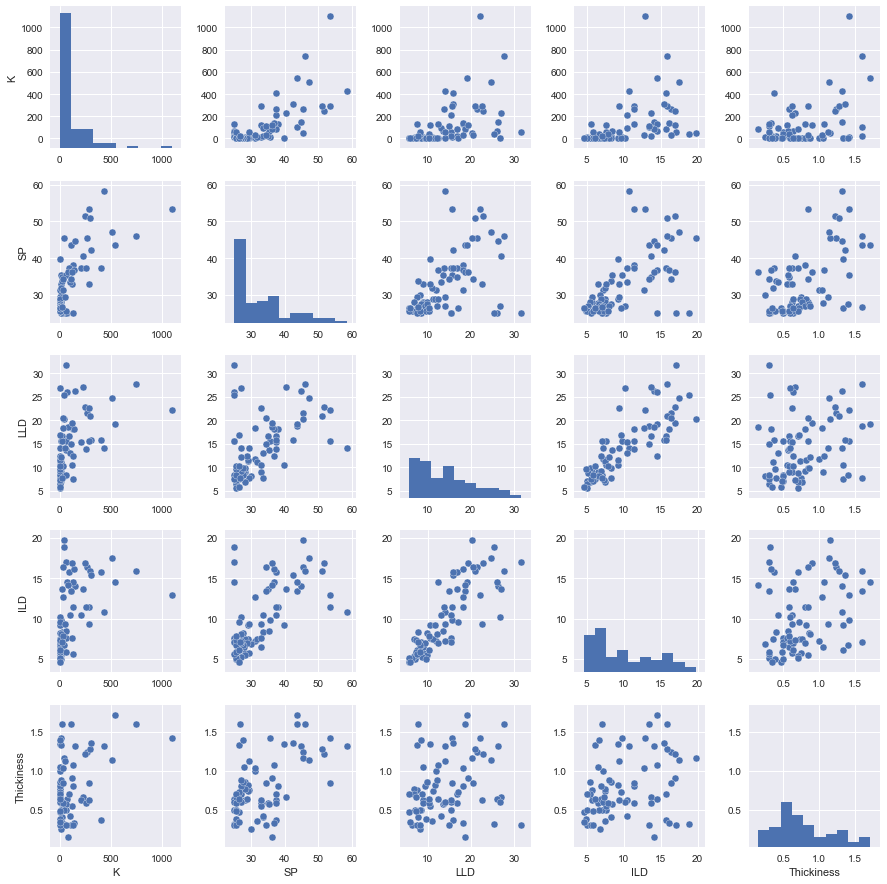

In [29]:
#df_train['k']=np.log(df_train['k'])
sns.set()
cols = ['K', 'SP', 'LLD', 'ILD', 'Thickiness']
sns.pairplot(df_train[cols], size = 2.5)
#8）sns，pairplot



plt.savefig("C:/Users/Administrator/Desktop/plot5.png",dpi=500)

In [30]:
df_train.describe()

,Thickiness,Por,K,Cal,LLD,GR,AC,RMN,RMG,ILD,...,SPmax,DGR,Ceil,Middle,Floor,Vsh,SP,Min,Max,Ave
count,77.000000,77.000000,77.000000,51.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,0.781818,20.782357,109.097489,2.552157,14.186052,72.399870,289.737740,6.643026,7.397403,10.051416,...,27.701299,0.287946,68.140791,56.140791,43.921755,37.050993,32.973457,28.215353,57.982858,50.006098
std,0.385267,3.933979,185.362718,3.582073,6.399876,16.257458,21.867339,2.976557,2.891950,4.204638,...,15.767275,0.177478,15.162542,15.162542,15.523965,13.010126,8.305651,4.760263,13.951349,10.631135
min,0.150000,8.000000,0.190000,0.183333,5.680000,0.500000,231.000000,2.870000,3.850000,4.590000,...,17.000000,0.010000,50.383446,38.383446,28.969261,23.232000,25.000000,23.232000,38.383446,35.126492
25%,0.500000,18.200000,6.400000,0.450000,8.710000,62.400000,278.000000,4.840000,5.560000,6.680000,...,18.000000,0.114286,53.944657,41.944657,29.945020,23.232000,26.235200,23.232000,46.851582,40.560108
50%,0.700000,20.700000,30.966700,0.800000,13.100000,73.100000,286.000000,5.850000,6.390000,8.460000,...,20.000000,0.271642,63.606510,51.606510,37.767688,32.947160,29.323200,27.470400,54.474467,46.391269
75%,1.050000,23.450000,129.250000,3.816667,18.300000,85.900000,304.700000,7.450000,8.200000,13.680000,...,20.000000,0.434247,79.009791,67.009791,54.047125,45.868293,37.352000,32.083787,67.009791,58.650534
max,1.720000,27.740000,1101.750000,15.650000,31.700000,102.400000,347.000000,17.300000,17.300000,19.750000,...,55.000000,0.647761,107.600450,95.600450,88.074242,68.425616,58.350400,37.493867,95.600450,75.607558


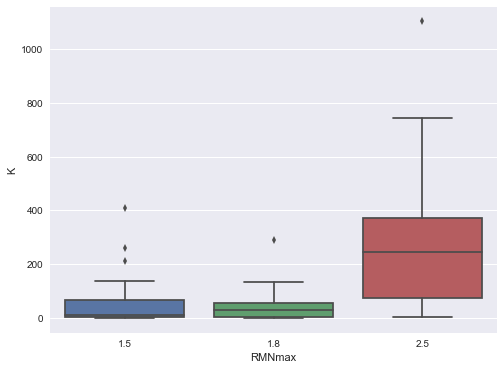

In [31]:

#box plot overallqual/saleprice
var = 'RMNmax'
data = pd.concat([df_train['K'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="K", data=data)

In [32]:
from sklearn.model_selection import train_test_split,cross_val_score
y=np.log(df_train['K'])



#X=df_train[['thickiness', 'por', 'lld', 'ild', 'RMNmAX', 'Spmax', 'sp']]

X=df_train[['Thickiness', 'Por', 'LLD', 'ILD', 'SP']]

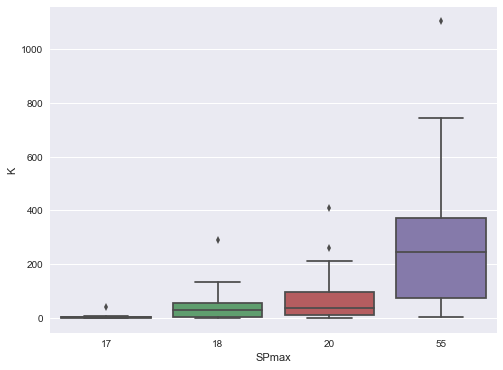

In [33]:
#box plot overallqual/saleprice
var = 'SPmax'
data = pd.concat([df_train['K'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="K", data=data)


In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=13)

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
rfr=RandomForestRegressor(n_estimators=150)
print(cross_val_score(rfr,X,y,cv=5))
rfr.fit(X_train,y_train)
predicts_rfr=rfr.predict(X_test)
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_rfr),mean_absolute_error(y_test,predicts_rfr),mean_squared_error(y_test,predicts_rfr)))


[ 0.46270976  0.30281633  0.71920066 -1.35717443  0.53443386]
the r2_score is 0.399649521253 	mean_absolute_error is 1.2035256842 	 the mean_squared_error is 2.66111155663


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

Fitting 3 folds for each of 298 candidates, totalling 894 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 615 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 894 out of 894 | elapsed:   53.2s finished


Best score: 0.742
Best parameter set:
	plf__criterion:'mae'
	plf__n_estimators:16


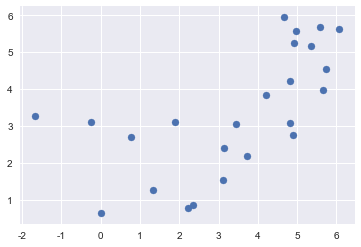

In [37]:
pipeline=Pipeline([
    ('plf',RandomForestRegressor())
])
parameters={
    'plf__n_estimators':tuple(np.array(range(1,150))),
    'plf__criterion':('mse','mae'),
    #'plf__max_depth':(150,155,160),
    #'plf__min_samples_split':(2,3),
    #'plf__min_samples_leaf':(1,2,3), 
    #'plf__bootstrap':(True,False),
}
grid_search=GridSearchCV(pipeline,parameters,n_jobs=-1,verbose=1,cv=3)
grid_search.fit(X_train,y_train)
print('Best score: %0.3f' %grid_search.best_score_)
print('Best parameter set:')
best_parameters=grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s:%r'%(param_name ,best_parameters[param_name]))
predict_grid=grid_search.predict(X_test)
plt.scatter(y_test,predict_grid)

plt.show()


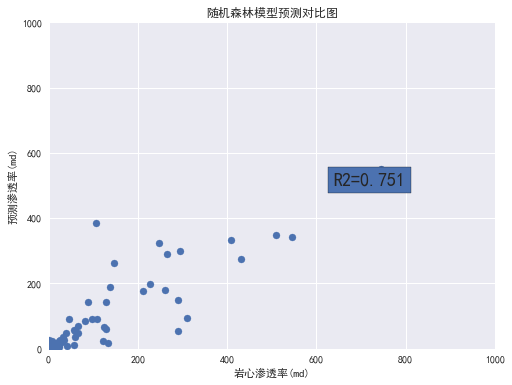

In [38]:

from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
f, ax = plt.subplots(figsize=(8, 6))
predict_grid=grid_search.predict(X)
plt.scatter(np.exp(y),np.exp(predict_grid))
plt.title(u"随机森林模型预测对比图")
plt.xlabel(u'岩心渗透率(md)')
plt.ylabel(u'预测渗透率(md)')
t = "R2=0.751"
plt.axis([0,1000,0,1000])
plt.text(800, 500, t, ha='right',  wrap=True,fontsize=18,bbox=dict(boxstyle="square"))
plt.savefig("C:/Users/Administrator/Desktop/plot7.tif",dpi=500)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr=LinearRegression()

In [41]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
predicts=lr.predict(X)

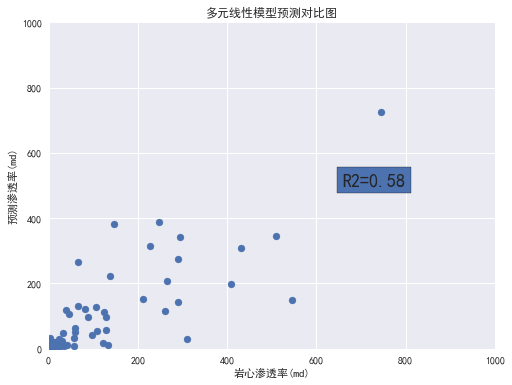

In [43]:
f, ax = plt.subplots(figsize=(8, 6))
plt.scatter(np.exp(y),np.exp(predicts))
plt.xlabel(u'岩心渗透率(md)')
plt.ylabel(u'预测渗透率(md)')
plt.title(u"多元线性模型预测对比图")

lr.score(X_test,y_test)
t = "R2=0.58"
plt.axis([0,1000,0,1000])
plt.text(800, 500, t, ha='right',  wrap=True,fontsize=18,bbox=dict(boxstyle="square"))
plt.savefig("C:/Users/Administrator/Desktop/plot8.tif",dpi=500)

In [ ]:
grid_search.score(X_test,y_test)